In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [108]:
from google.colab import files
files=files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (3).csv


VERİ SETİ ÖN İNCELEME KISMI

In [109]:
veri=pd.read_csv("Titanic-Dataset.csv")
veri.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [110]:
veri.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


<Axes: xlabel='Survived', ylabel='count'>

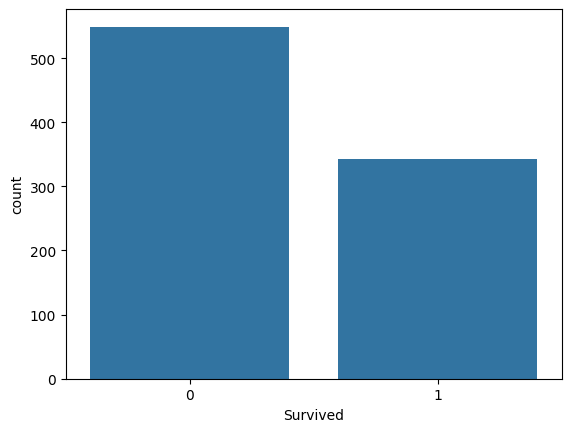

In [111]:
sns.countplot(x="Survived",data=veri)

BURADA TABLODAN GÖRDÜĞÜMÜZ ÜZERE 500 ÜZERİNDE ÖLÜMÜN VE 300 ÜN BİRAZ FAZLASI HAYATTA KALAN OLDUĞUNU GÖRÜYORUZ.

ZENGİNLERİN DAHA ÇOK HAYATTA KALDIĞINI,FAKİRLERİN DAHA ÖLDÜĞÜNÜ GÖZLEMLEYEBİLİRİZ

<Axes: xlabel='Survived', ylabel='count'>

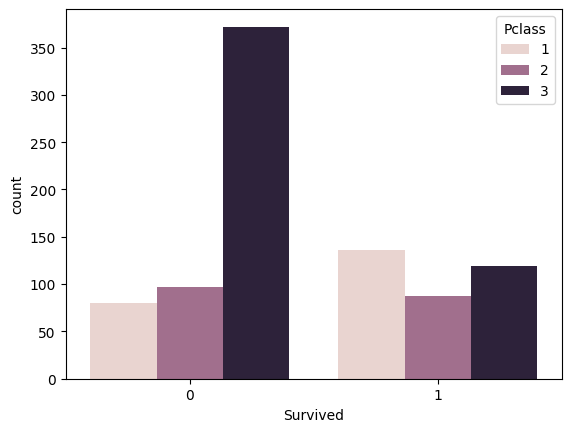

In [112]:
sns.countplot(x="Survived",hue="Pclass",data=veri)

ZENGİNLERİN DAHA ÇOK HAYATTA KALDIĞINI,FAKİRLERİN DAHA ÖLDÜĞÜNÜ GÖZLEMLEYEBİLİRİZ

<Axes: xlabel='Survived', ylabel='count'>

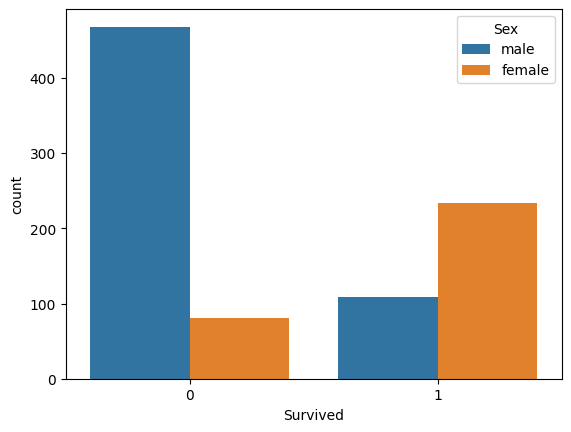

In [113]:
sns.countplot(x="Survived",hue="Sex",data=veri)

BURADANDA ERKEKLERİN DAHA ÇOK ÖLDÜĞÜNÜ SÖYLEYEBİLİRİZ

<Axes: xlabel='Age', ylabel='Count'>

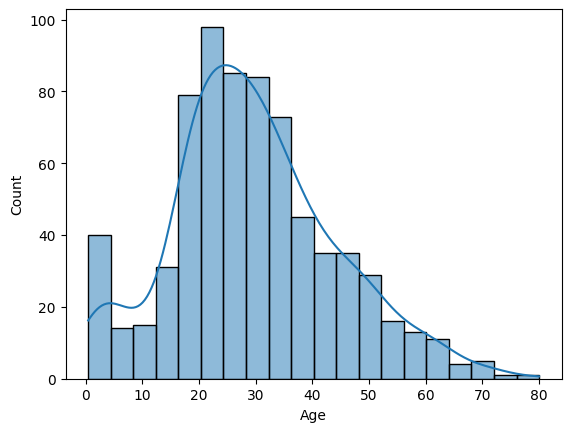

In [114]:
sns.histplot(x="Age",kde=True,data=veri)

BU HİSTOGRAMDANDA ÖLEN İNSANLARIN AĞIRLIKLI OLARAK 20-40 YAŞ ARALIĞINDA OLDUĞUNU GÖZLEMLEYEBİLİRİZ.

<Axes: xlabel='Fare', ylabel='Count'>

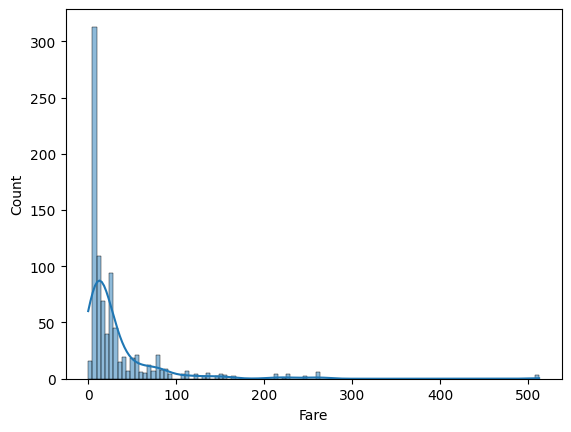

In [115]:
sns.histplot(x="Fare",kde=True,data=veri) #Bilet fiyatları histogramı

<Axes: xlabel='SibSp', ylabel='count'>

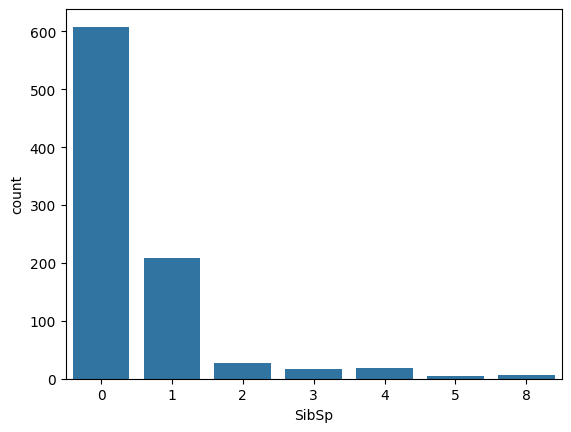

In [116]:
sns.countplot(x="SibSp",data=veri)#Yolcuların kadeş sayıları

VERİ ÖN İŞLEME KISMI

In [117]:
veri.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


AGE VE CABİN SÜTUNLARINDA EKSİK VERİ OLDUĞU İÇİN VERİ SETİNDEN KALDIRIYORUM.

In [118]:
veri.drop(["Cabin"],axis=1,inplace=True)

In [119]:
veri.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [120]:
veri.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [121]:
veri["Age"].fillna(veri["Age"].mean(),inplace=True)

<ipython-input-121-538ba0e6ddd2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  veri["Age"].fillna(veri["Age"].mean(),inplace=True)


In [123]:
veri["Age"].isnull().sum()

0

In [124]:
veri.dropna(inplace=True) #Geriye kalan boş değerleri sildik zaten 2 3 tane kalmıştı.

SEX VE EMBARKED SÜTUNLARINI KULLANABİLMEMİZ İÇİN ONLARI KATEGORİK HALA GETİMEM GEREKİYORU

In [125]:
sex=pd.get_dummies(veri["Sex"],drop_first=True).astype(int)  #Burada int a cevirdim çünkü sonucta true false şeklinde çıkıyodu

In [126]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [127]:
veri['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [128]:
embarked=pd.get_dummies(veri["Embarked"]).astype(int) #Aynı şekilde int e çevirdim 0 1 çıkması için

In [129]:
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [130]:
veri.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [131]:
veri.drop(['Embarked','Sex'],axis=1,inplace=True)

In [132]:
veri.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [133]:
veri=pd.concat([veri,sex,embarked],axis=1)

In [134]:
veri.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1


In [135]:
veri.dtypes #BURADA NAME VE TİCKET I KALDIRICAM ÇÜNKÜ Bİ İŞE YARAMIYOR

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
male,int64


In [136]:
veri.drop(["Name","Ticket"],axis=1,inplace=True)

In [137]:
veri.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


LOJİSTİK REGRESYON ANALİZİ
(YOLCU HAYATTA KALDIMI/KALMADIMI TAHMİNİ)

In [138]:
X=veri.drop(["Survived"],axis=1)
y=veri["Survived"]

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
L_model=LogisticRegression()

In [143]:
L_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
L_model.score(X_test,y_test)

0.7668161434977578

MODEL DOĞRULUĞUMUZU R^2 İLE TEST ETTİM VE SONUÇ 0.76-0.77 ARASI BİR DEĞER ÇIKTI. MODELİMİZ TEST VERİSİNİ %77 ORANINDA DOĞRU TAHMİN EDİYOR DİYEBİLİRİZ.

In [145]:
L_model.score(X_train,y_train)

0.7732732732732732

TRAİN İÇİNDE 0.77 ÇIKTI NEREDEYDE AYNILAR ZATEN BİRBİRLERİNE YAKIN DEĞERLER GÖRMEK İSTERİZ.

In [146]:
veri.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


ŞİMDİ MODELİN TAHMİNLERİNE BAKALIM

In [147]:
tahmin1=np.array([[1,0,3,22,1,0,7.2500,1,0,0]])

In [148]:
L_model.predict(tahmin1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

array([0]) -> ölmüş,
array([1]) -> kurtulmuş.
Mesela ilk kişi için tahmini doğru yaptı ölmüş diyo harbiden ölmüş veri setinde aynı array([0]) çıktısı verdi.

In [149]:
tahmin2=np.array([[5,0,3,35,0,0,8.0500,1,0,0]])

In [150]:
L_model.predict(tahmin2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

4.KİŞİ İÇİN TAHMİNİDE DOĞRU ÇIKTI

In [151]:
tahmin3=np.array([[4,1,1,35,1,0,53.1000,0,0,0]])

In [152]:
L_model.predict(tahmin3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

BUNU YANLIŞ VERDİ MESELA DATASETDE 1 YANİ YAŞIYOR OLARAK GÖZÜKÜYOR.MODEL ÖLMÜŞ OLARAK TAHMİN ETTİ...

BELKİ MODEL HERKES İÇİN ÖLDÜ DİYE ÇIKTI VERİYO DİYE İÇİME KUŞKU DÜŞTÜ Bİ TUR ÖLMEYEN BİRİNİN VERİLERİNİ GİRDİM

In [153]:
tahmin4=np.array([[2,1,1,38,1,0,71.2833,0,1,0]])

In [154]:
L_model.predict(tahmin4)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

MODEL GELİBA HERKES İÇİN ÖLDÜ DİYO 2. KİŞİ HAYATTA KALMIŞ AMA MODEL DOGRU ÇIKTI VERMİYOR.

In [155]:
veri.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.000000,1,0,7.2500,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,0,1
5,6,0,3,29.699118,0,0,8.4583,1,0,1,0
6,7,0,1,54.000000,0,0,51.8625,1,0,0,1
7,8,0,3,2.000000,3,1,21.0750,1,0,0,1
8,9,1,3,27.000000,0,2,11.1333,0,0,0,1
9,10,1,2,14.000000,1,0,30.0708,0,1,0,0


ÖZELLİKLE 9. KİŞİYİ GİRDİM HAYATTA KALMIŞ OLARAK GÖZÜKÜYOR.

In [158]:
tahmin5=np.array([[1,2,14,1,0,30.0708,0,1,0,0]])

In [159]:
L_model.predict(tahmin5)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

PASSENGER İD Yİ DAHİL ETTİĞİM İÇİN DOĞRU TAHMİN YAPAMIYORMUŞ MODEL O YÜZDEN ÖLDÜ ÇIKTISI VERİYOR HERKESE ANLADIM AMA HATAYI.